In [125]:
import numpy as np
import pandas as pd
import datetime
#import scipy
#import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy.stats import norm,t,shapiro, kurtosis, skew, mannwhitneyu,kruskal,  friedmanchisquare
import scipy.stats as stats 

In [126]:
# apagar deposit,withd,  carregar no xlsx ou csv, apagar as ordens abertas. Se omeçar em ordem decrescente, inverter
cyb = pd.read_csv('Cyborg-Darwinex.csv',index_col='Open Date',parse_dates=True)

#cyb = pd.read_csv('Cyborg-Darwinex.csv')

#cyb = pd.read_excel('Cyborg-Darwinex.xlsx',index_col='Open Date',parse_dates=True)

cyb.columns

Index(['Close Date', 'Symbol', 'Action', 'Units/Lots', 'Open Price',
       'Close Price', 'Commission', 'Swap', 'Pips', 'Profit', 'Gain',
       'Duration (DD:HH:MM:SS)', 'Profitable(%)', 'Profitable(time duration)',
       'Drawdown', 'Risk:Reward', 'Max(pips)', 'Max(EUR)', 'Min(pips)',
       'Min(EUR)', 'Entry Accuracy(%)', 'Exit Accuracy(%)',
       'ProfitMissed(pips)', 'ProfitMissed(EUR)'],
      dtype='object')

In [127]:
cyb.head()
#cyb.tail()

,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,Profit,...,Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
Open Date,,,,,,,,,,,,,,,,,,,,,
2023-12-20 22:16:00,12/21/2023 09:22,EURCAD,Sell,0.07,1.46119,1.46119,-0.35,0.10,0.0,-0.25,...,20.9,4.23,4.0,0.000,-16.9,0.000,19.1,80.9,-4.0,0.00
2023-12-20 23:22:00,12/21/2023 08:27,USDJPY,Buy,0.07,143.59800,143.10200,-0.32,2.90,-49.6,-19.58,...,83.1,19.31,4.1,1.845,-79.0,-35.550,4.9,35.4,-53.7,-24.17
2023-12-20 21:43:00,12/21/2023 01:49,EURAUD,Sell,0.10,1.62173,1.62443,-0.50,-1.51,-27.0,-18.63,...,46.0,26.11,1.7,1.054,-44.3,-27.466,3.7,37.6,-28.7,-17.79
2023-12-20 22:48:00,12/21/2023 01:46,AUDUSD,Buy,0.08,0.67344,0.67368,-0.25,-1.80,2.4,-0.29,...,12.6,4.07,3.1,2.263,-12.6,-9.198,19.7,95.5,-0.7,-0.51
2023-12-20 22:51:00,12/21/2023 01:00,EURUSD,Buy,0.09,1.09398,1.09440,-0.45,-3.01,4.2,-0.01,...,9.8,1.88,5.2,4.264,-9.8,-8.036,34.7,93.3,-1.0,-0.82


In [128]:
 cyb = cyb[::-1]

In [129]:
cyb.head()

,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,Profit,...,Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
Open Date,,,,,,,,,,,,,,,,,,,,,
2017-07-03 00:57:00,07/03/2017 01:18,EURAUD,Sell,0.02,1.48693,1.48595,-0.10,0.00,9.8,1.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 00:25:00,07/04/2017 00:50,GBPCAD,Sell,0.02,1.68413,1.68306,-0.11,0.00,10.7,1.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03 21:30:00,07/04/2017 00:55,GBPAUD,Buy,0.01,1.69015,1.69071,-0.06,-0.07,5.6,0.25,...,17.0,3.04,5.6,0.392,-17.0,-1.19,24.8,100.0,0.0,0.00
2017-07-04 22:24:00,07/04/2017 23:03,GBPAUD,Sell,0.01,1.70014,1.69896,-0.06,0.00,11.8,0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05 23:36:00,07/06/2017 01:00,GBPAUD,Buy,0.02,1.70017,1.70117,-0.11,-0.17,10.0,1.06,...,19.5,0.03,29.5,3.835,0.0,0.00,100.0,33.9,-19.5,-2.54


In [130]:
cyb.index

DatetimeIndex(['2017-07-03 00:57:00', '2017-07-04 00:25:00',
               '2017-07-03 21:30:00', '2017-07-04 22:24:00',
               '2017-07-05 23:36:00', '2017-07-05 23:38:00',
               '2017-07-06 21:41:00', '2017-07-06 23:33:00',
               '2017-07-06 23:19:00', '2017-07-06 23:12:00',
               ...
               '2023-12-13 21:15:00', '2023-12-14 22:48:00',
               '2023-12-14 23:00:00', '2023-12-19 22:10:00',
               '2023-12-18 23:23:00', '2023-12-20 22:51:00',
               '2023-12-20 22:48:00', '2023-12-20 21:43:00',
               '2023-12-20 23:22:00', '2023-12-20 22:16:00'],
              dtype='datetime64[ns]', name='Open Date', length=4396, freq=None)

In [131]:
print('Numero de retornos')
print(cyb['Gain'].count())

Numero de retornos
4396


In [132]:
print('Soma dos Gains (em decimais)')
print("%.2f" %cyb['Gain'].sum())

Soma dos Gains (em decimais)
165.03


In [133]:
LucroTotal = cyb['Profit'].sum()
print('Soma dos lucros')
print("%.2f" %LucroTotal)

Soma dos lucros
11240.87


<Axes: >

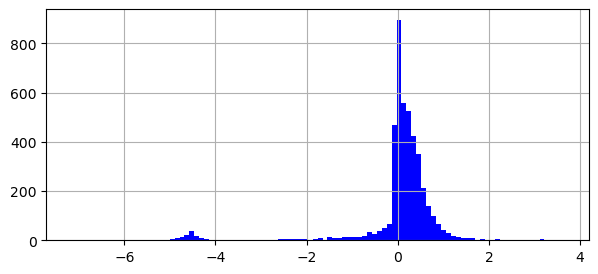

In [134]:
#fig=plt.figure(figsize=(8,6))
#his=fig.add_axes([0,0,1,1])
Gain = cyb['Gain']
Gain.hist(bins = 100, color = 'blue', figsize=(7,3))

<Axes: ylabel='Density'>

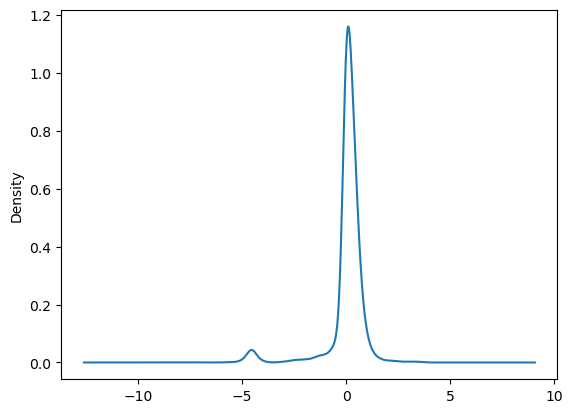

In [135]:
Gain.plot.kde()

<Axes: title={'center': 'Daily Gains'}, xlabel='Open Date'>

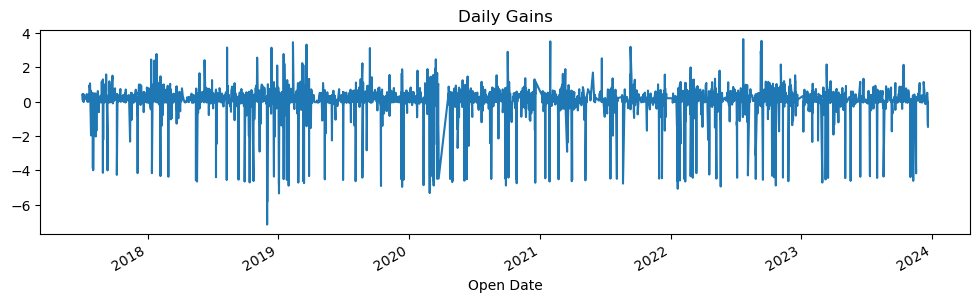

In [136]:
# Gráfico dos gains
Gain.plot(label='Gains',figsize=(12,3),title='Daily Gains')

<Axes: xlabel='Open Date'>

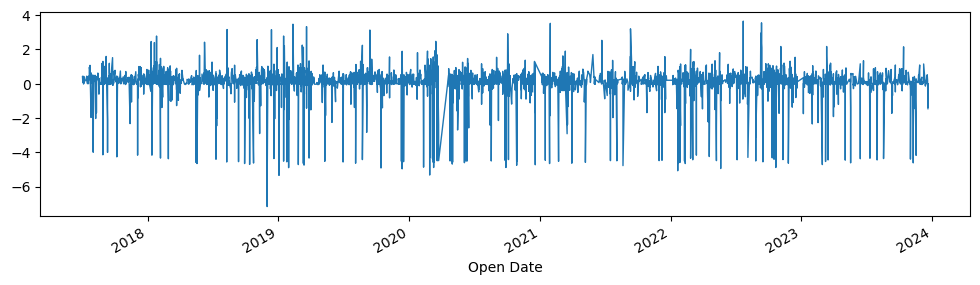

In [137]:
Gain.plot.line(x='Open Date',y='Gain',figsize=(12,3),lw=1)

<Axes: title={'center': 'Expectancy'}, xlabel='Open Date'>

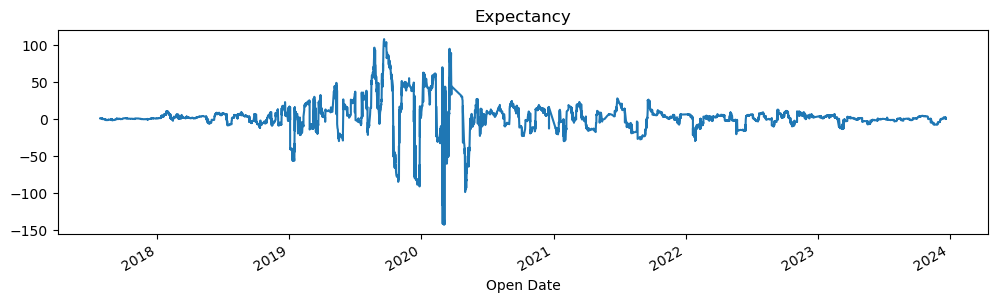

In [138]:
# Isolate the adjusted closing prices 
adj_profits_px = cyb['Profit']

# Calculate the moving average
Esp = adj_profits_px.rolling(window=30).mean()

# Inspect the result
# print(Esp[-10:])
# print(Esp)
Esp.plot.line(label='Curva',figsize=(12,3),title='Expectancy')

<Axes: title={'center': 'Curva de Capital'}, xlabel='Open Date'>

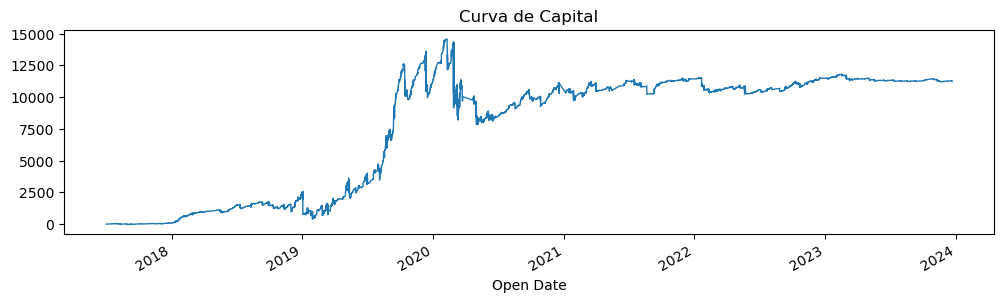

In [139]:
CurvaDeCapital = cyb['Profit Cumulative'] = cyb['Profit'].cumsum()
CurvaDeCapital.plot.line(x='Open Date',y='Profit',figsize=(12,3),lw=1,title='Curva de Capital')

<Axes: title={'center': 'Volume Negociado'}, xlabel='Open Date'>

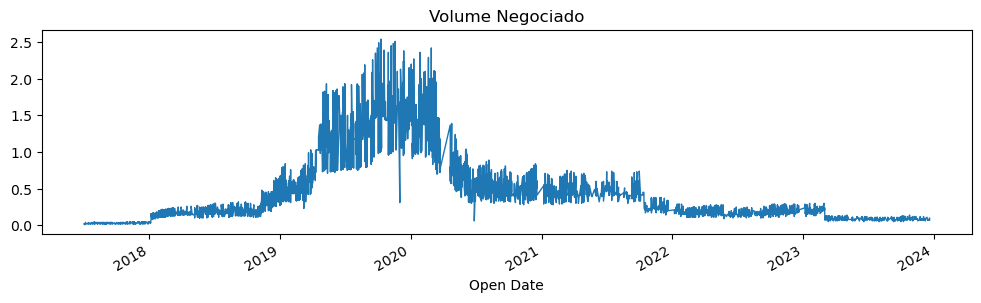

In [140]:
Volume = cyb['Units/Lots']
Volume.plot.line(x='Open Date',y='Units/Lots',figsize=(12,3),lw=1 ,title='Volume Negociado')

In [141]:
DepositoInicial = 15942.61

In [142]:
print(round(LucroTotal,2))

11240.87


In [143]:
Retorno = (LucroTotal / DepositoInicial) * 100
print("O retorno total durante o período foi de %.2f %%" %Retorno)

O retorno total durante o período foi de 70.51 %


In [144]:
data1 = datetime.date(day=3, month=7, year=2017)
data2 = datetime.date(day=21, month=12, year=2023)

diferenca = data2 - data1
n_meses = diferenca.days // 30
print(f"O período em meses foi de {n_meses} meses")

O período em meses foi de 78 meses


In [145]:
# Cálculo da taxa mensal
# https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/juros-compostos/
# https://pt.wikipedia.org/wiki/Juro
i = (np.power((1 + LucroTotal/DepositoInicial), (1 / n_meses))) - 1
print("O retorno foi de %.2f%% ao mês" % round(i*100,2))

O retorno foi de 0.69% ao mês


## Análise Estatística ##

<Axes: >

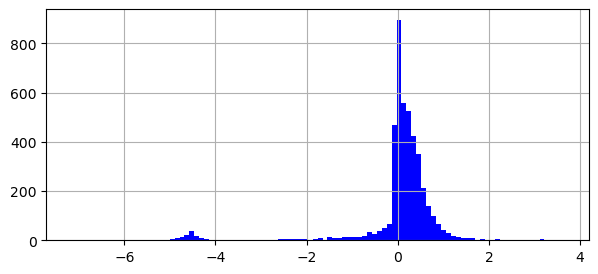

In [147]:
#fig=plt.figure(figsize=(8,6))
#his=fig.add_axes([0,0,1,1])
Gain = cyb['Gain']
Gain.hist(bins = 100, color = 'blue', figsize=(7,3))

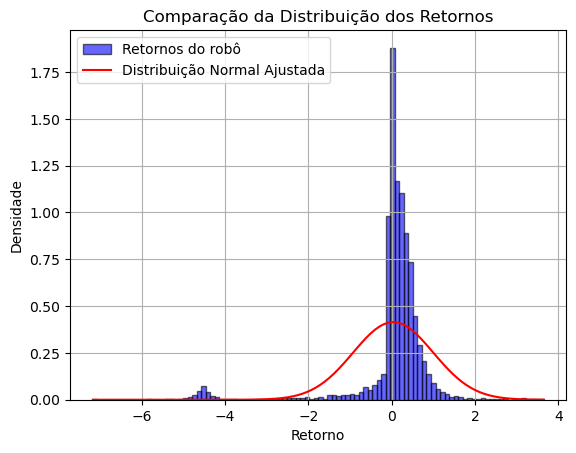

In [148]:
# Ajustando uma distribuição normal como exemplo
mu, sigma = np.mean(Gain), np.std(Gain)
x = np.linspace(min(Gain), max(Gain), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plotando histograma e curva teórica
plt.hist(Gain, bins=100, density=True, alpha=0.6, color='blue', edgecolor='black', label='Retornos do robô')
plt.plot(x, pdf, 'r-', label='Distribuição Normal Ajustada')
plt.legend()
plt.title('Comparação da Distribuição dos Retornos')
plt.xlabel('Retorno')
plt.ylabel('Densidade')
plt.grid()
plt.show()

In [149]:
print('Normal Test')
x = cyb['Gain']
print('p-value Shapiro')
#print("%.6f" % shapiro_results[1])
# normality test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(x) ))

Normal Test
p-value Shapiro
Statistics=0.582, p=0.000
Sample does not look Gaussian (reject H0)
excess kurtosis of normal distribution (should be 0): 14.703405756200496
skewness of normal distribution (should be 0): -3.343756856414053


### Excesso de Curtose = 14.70
- A distribuição normal tem curtose **0**, mas seus dados têm um valor muito maior, indicando **caudas pesadas** (possivelmente muitos valores extremos ou outliers).

### Assimetria (Skewness) = -3.34
- A distribuição normal deveria ter assimetria **0**, mas esse valor negativo alto mostra que os dados estão **fortemente enviesados à esquerda**, sugerindo uma concentração maior de valores na parte superior da distribuição.

### Conclusão
Os dados apresentam **caudas extremas** e **forte assimetria**, fazendo com que a distribuição se desvie da normalidade. Isso sugere que **métodos estatísticos não paramétricos** podem ser mais adequados para analisá-los.

# Kernel Density Estimation (KDE)

O **Kernel Density Estimation (KDE)** é uma técnica estatística usada para estimar a **função de densidade de probabilidade** de uma variável aleatória. Ele fornece uma representação suave da distribuição dos dados, sendo uma alternativa mais refinada ao histograma.  
Seu gráfico é **normalizado**, ou seja, a área sob a curva é **1**.

## Fórmula Matemática do KDE

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K \left(\frac{x - x_i}{h} \right)
$$

### Onde:
- \( \hat{f}(x) \) → Estimativa da densidade no ponto \( x \).
- \( n \) → Número de observações.
- \( h \) → Largura de banda.
- \( K \) → Função kernel.
- \( x_i \) → Valores da amostra.

O KDE é amplamente utilizado em **estatística, finanças e aprendizado de máquina** para visualizar distribuições de dados sem assumir uma forma específica.

<Axes: ylabel='Density'>

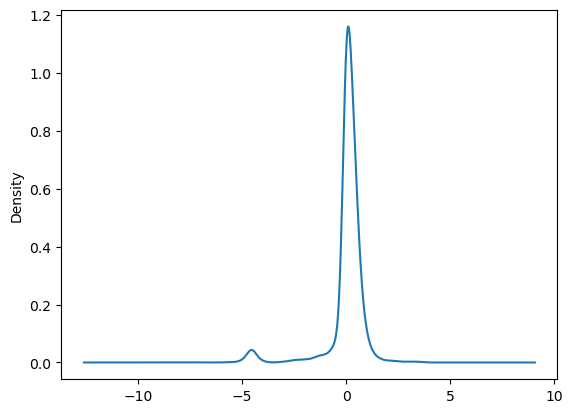

In [152]:
Gain.plot.kde()

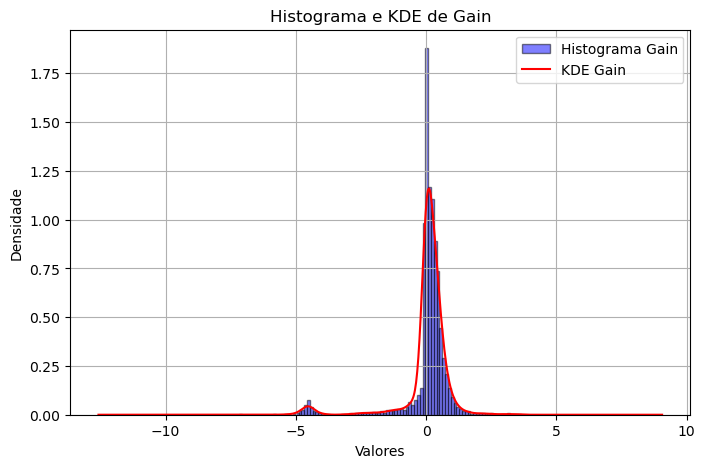

In [153]:
import matplotlib.pyplot as plt

# Criando a figura
plt.figure(figsize=(8, 5))

# Plotando o histograma (normalizado para coincidir com o KDE)
Gain.plot.hist(bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histograma Gain')

# Adicionando a estimativa de densidade Kernel (KDE)
Gain.plot.kde(color='red', label='KDE Gain')

# Configurações do gráfico
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Histograma e KDE de Gain')
plt.legend()
plt.grid()
plt.show()

In [154]:
import numpy as np
import pandas as pd

# Gerando retornos aleatórios seguindo uma distribuição normal
np.random.seed(42)  # Para reprodutibilidade
retornos_aleatorios = np.random.normal(loc=0, scale=0.02, size=len(Gain))  # Média 0 e volatilidade 2%

# Criando um DataFrame para organizar os dados
df_aleatorio = pd.DataFrame({'Retorno Aleatório': retornos_aleatorios})

print(df_aleatorio.head())

   Retorno Aleatório
0           0.009934
1          -0.002765
2           0.012954
3           0.030461
4          -0.004683


array([[<Axes: title={'center': 'Retorno Aleatório'}>]], dtype=object)

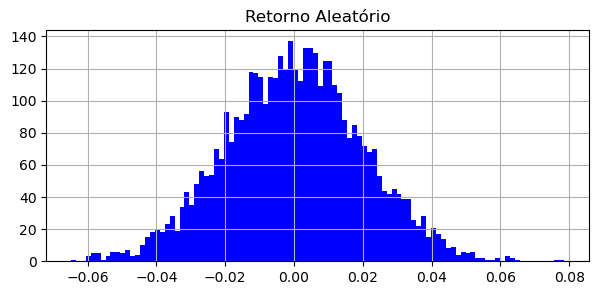

In [155]:
df_aleatorio.hist(bins = 100, color = 'blue', figsize=(7,3))

## Teste Estatístico para Comparação ##

In [157]:
import scipy.stats as stats  
# Teste t de Student para comparação com os retornos do robô
stat, p_value = stats.ttest_ind(Gain, retornos_aleatorios)

print(f"Estatística do teste t: {stat:.4f}, p-valor: {p_value:.4f}")

# Interpretação do p-valor
if p_value < 0.05:
    print("Diferença estatisticamente significativa entre os retornos.")
else:
    print("Não há evidência suficiente para afirmar que os retornos são diferentes.")

Estatística do teste t: 2.5729, p-valor: 0.0101
Diferença estatisticamente significativa entre os retornos.


* O valor 2.5729 significa que há uma diferença entre as médias das duas amostras

* O teste t de Student é usado quando os dados são aproximadamente normais

## Teste de Kolmogorov-Smirnov (KS) para validar se os retornos seguem uma distribuição t-Student:

In [161]:
import scipy.stats as stats

# Ajustando uma distribuição t-Student aos dados do robô
df, loc, scale = stats.t.fit(Gain)
stat, p_value = stats.kstest(Gain, 't', args=(df, loc, scale))

print(f"KS-Test Estatística: {stat:.4f}, p-valor: {p_value:.4f}")

if p_value > 0.05:
    print("Os retornos do robô podem seguir uma distribuição t-Student.")
else:
    print("Os retornos do robô não se ajustam bem à distribuição t-Student.")

KS-Test Estatística: 0.1045, p-valor: 0.0000
Os retornos do robô não se ajustam bem à distribuição t-Student.


## Comparação da distribuição dos retornos x t-Student

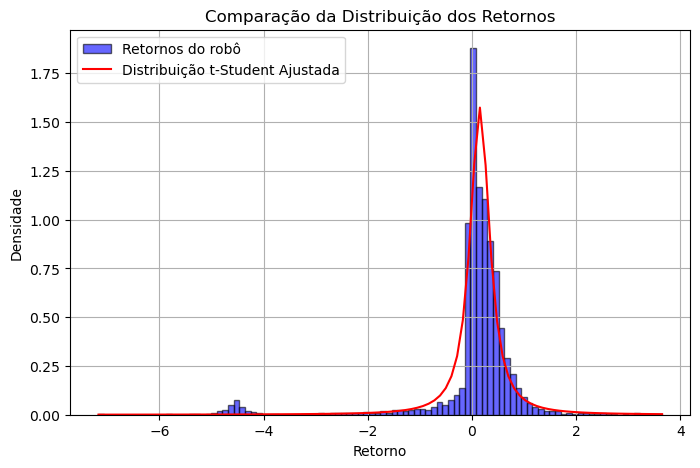

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ajustando uma distribuição t-Student aos dados do robô
df, loc, scale = stats.t.fit(Gain)
x = np.linspace(min(Gain), max(Gain), 100)
pdf_t = stats.t.pdf(x, df, loc, scale)

# Plotando histograma e curva teórica da distribuição t-Student
plt.figure(figsize=(8, 5))
plt.hist(Gain, bins=100, density=True, alpha=0.6, color='blue', edgecolor='black', label='Retornos do robô')
plt.plot(x, pdf_t, 'r-', label='Distribuição t-Student Ajustada')
plt.legend()
plt.title('Comparação da Distribuição dos Retornos')
plt.xlabel('Retorno')
plt.ylabel('Densidade')
plt.grid()
plt.show()

# Interpretação da diferença entre KDE e Teste t

O fato de os gráficos de KDE e histograma dos retornos do robô e da distribuição **t-Student** parecerem **visualmente semelhantes**, mas o **teste t indicar uma diferença estatisticamente significativa**, pode ser explicado por alguns fatores importantes:

### **1. Semelhança Visual ≠ Igualdade Estatística**
Embora as distribuições pareçam **parecidas visualmente**, o **teste t analisa diferenças nas médias e na variabilidade das amostras** em um nível mais preciso. Pequenas diferenças **podem ser estatisticamente significativas**, mesmo que não sejam evidentes no gráfico.

### **2. Diferença na Média dos Retornos**
O **teste t compara as médias das amostras**. Se os retornos do robô tiverem uma média ligeiramente diferente dos retornos da distribuição ajustada, a estatística pode detectar essa diferença, mesmo que visualmente os dados pareçam ter um ajuste bom.

### **3. Variabilidade dos Dados (Desvio Padrão)**
Mesmo que a **distribuição t-Student tenha caudas pesadas**, o **desvio padrão (volatilidade)** pode ser diferente da amostra original. O teste t avalia **não apenas a forma da distribuição**, mas também a dispersão dos dados.

### **4. Sensibilidade do Teste t**
O teste t é **sensível a diferenças nas médias**, especialmente quando se tem um **grande volume de dados**. Pequenas variações podem ser detectadas como estatisticamente significativas, mesmo que não sejam muito perceptíveis no gráfico.

## Conclusão
Os retornos do robô **não seguem exatamente a distribuição t-Student**, mesmo que visualmente pareça semelhante. Isso significa que o comportamento do robô pode ter padrões distintos, como **autocorrelação, dinâmica temporal ou impacto de eventos de mercado**, que um ajuste simples de distribuição não captura.

# Teste não paramétrico Mann-Whitney U

O **teste de Mann-Whitney U** é um método **não paramétrico**, usado para comparar duas amostras independentes sem assumir que elas seguem uma distribuição específica. Ele é especialmente útil quando os dados **não são normalmente distribuídos**, como no caso dos retornos do robô.

## Por que é não paramétrico?
- **Não assume normalidade** → Diferente do teste t, ele não exige que os dados sigam uma distribuição normal.
- **Compara medianas** → Enquanto o teste t foca nas médias, Mann-Whitney U avalia se uma amostra tem valores consistentemente maiores que outra.
- **Adequado para dados com caudas pesadas** → Funciona bem em dados financeiros, que frequentemente possuem **assimetria e curtose alta**.

## Quando usar?
✔ **Quando os dados não seguem uma distribuição normal.**  
✔ **Quando queremos comparar dois grupos independentes.**  
✔ **Quando há outliers que podem afetar um teste paramétrico.**  

In [167]:
# Teste Mann-Whitney U
stat, p_value = stats.mannwhitneyu(Gain, retornos_aleatorios)

print(f"Estatística de Mann-Whitney U: {stat:.4f}, p-valor: {p_value:.4f}")

# Interpretação do p-valor
if p_value < 0.05:
    print("Diferença estatisticamente significativa entre os retornos.")
else:
    print("Não há evidência suficiente para afirmar que os retornos são diferentes.")

Estatística de Mann-Whitney U: 13391975.0000, p-valor: 0.0000
Diferença estatisticamente significativa entre os retornos.


# Interpretação dos Resultados

- **Estatística U = 13.391.975** → Um valor alto indica que há uma diferença consistente entre as distribuições das duas amostras.
- **p-valor = 0.0000** → Como esse valor é menor que **0.05**, rejeitamos a hipótese nula (**H₀**), que assume que as distribuições dos retornos são iguais.

## Conclusão
Os retornos do robô **não seguem um padrão aleatório**, sugerindo que ele pode ter alguma **estrutura ou estratégia** que o diferencia do comportamento puramente randômico.

# Calculando a probabilidade de um determinado retorno para distribuições não normais:

Se os retornos **não seguem uma distribuição normal**, podemos usar:

- **Distribuição empírica** → Contar a proporção de retornos abaixo/acima do valor.
- **Estimativa de Densidade Kernel (KDE)** → Aproximar a distribuição e calcular a área abaixo/acima do valor.

**Distribuição empírica**
- **Não assume nenhuma distribuição estatística** → Baseia-se somente nos dados reais.
- **Útil para séries financeiras** → Se os retornos do robô têm caudas pesadas ou comportamento irregular, essa abordagem é mais confiável.

In [172]:
# Calcular a proporção de retornos do robô menores que 10%
# Filtra os retornos abaixo de 10% (convertendo para True ou False) e calcula a proporção desses valores em relação ao total.
# A média de um conjunto de valores True e False retorna a proporção de valores True.
probabilidade_empirica = (Gain < 0.10).mean()

print(f"Probabilidade empírica de retorno abaixo de 10%: {probabilidade_empirica:.4f}")

Probabilidade empírica de retorno abaixo de 10%: 0.4456


**Estimativa de Densidade Kernel (KDE)**
- Usa a Estimativa de Densidade Kernel (KDE), que suaviza a distribuição dos retornos e nos permite calcular essa área com mais precisão.
- É calculada a área sob a curva para valores menores ou igual que probabilidade desejada, o que representa a probabilidade acumulada.


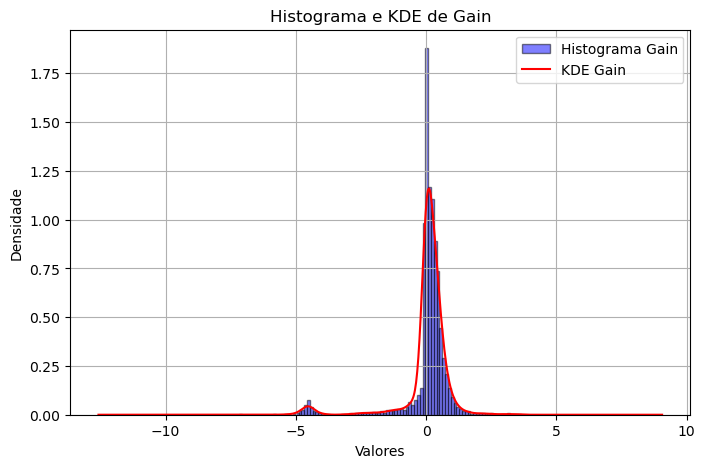

In [174]:
import matplotlib.pyplot as plt

# Criando a figura
plt.figure(figsize=(8, 5))

# Plotando o histograma (normalizado para coincidir com o KDE)
Gain.plot.hist(bins=100, density=True, alpha=0.5, color='blue', edgecolor='black', label='Histograma Gain')

# Adicionando a estimativa de densidade Kernel (KDE)
Gain.plot.kde(color='red', label='KDE Gain')

# Configurações do gráfico
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Histograma e KDE de Gain')
plt.legend()
plt.grid()
plt.show()

Digite o valor de N% para calcular a probabilidade pela KDE:  10


Probabilidade pela KDE de retorno abaixo de 10.0%: 42.98%


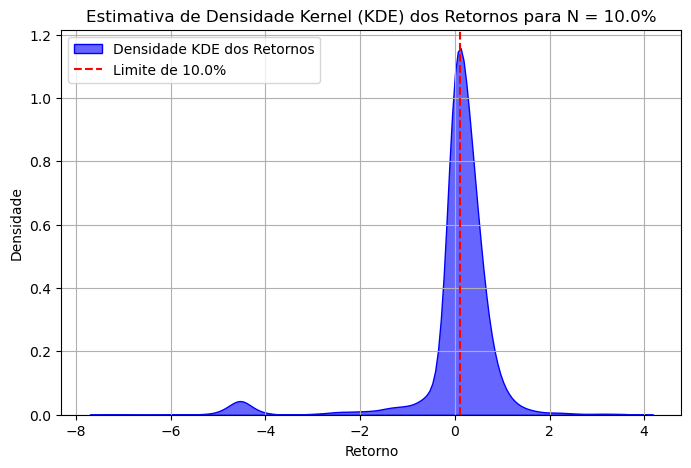

In [175]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Definir o valor N como limite de retorno desejado
N = float(input("Digite o valor de N% para calcular a probabilidade pela KDE: "))
npp = N/100

# Criando a KDE dos retornos do robô
kde = gaussian_kde(Gain)

# Gerando pontos para avaliação
x_vals = np.linspace(min(Gain), max(Gain), 1000)
kde_vals = kde.pdf(x_vals)

# Calculando a probabilidade acumulada (integral da KDE abaixo de N)
probabilidade_kde = kde.integrate_box_1d(-np.inf, npp)


print(f"Probabilidade pela KDE de retorno abaixo de {N}%: {probabilidade_kde * 100:.2f}%")

# Visualizando a distribuição e área abaixo de N
plt.figure(figsize=(8, 5))
sns.kdeplot(Gain, fill=True, alpha=0.6, color='blue', label='Densidade KDE dos Retornos')
plt.axvline(x=npp, color='red', linestyle='--', label=f'Limite de {N}%')
plt.xlabel('Retorno')
plt.ylabel('Densidade')
plt.title(f'Estimativa de Densidade Kernel (KDE) dos Retornos para N = {N}%')
plt.legend()
plt.grid()
plt.show()

In [176]:
# Ordenando os retornos
dados_ordenados = np.sort(Gain)

# Obtendo quantis teóricos da distribuição normal
quantis_teoricos = stats.norm.ppf((np.arange(1, len(dados_ordenados) + 1) - 0.5) / len(dados_ordenados))

# Calculando a correlação de Pearson entre os quantis observados e os teóricos
correlacao, _ = stats.pearsonr(dados_ordenados, quantis_teoricos)

print(f"Correlação dos quantis para a ação: {correlacao:.4f}")

Correlação dos quantis para a ação: 0.7630


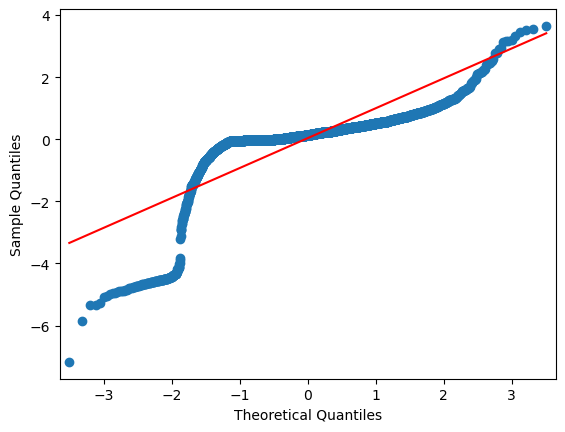

In [177]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(Gain, line='s')
plt.show()